![Typing SVG](https://readme-typing-svg.demolab.com?font=Roboto+Slab&weight=900&size=38&pause=1000&color=5C5470&center=true&vCenter=true&width=600&lines=Employee+Performance+Analysis)

## Business Problem 

The goal of this project is to analyze employee data to predict employee performance ratings at a company. The ability to predict high and low performers can help with talent management decisions like promotions.

## Data 

The data contains employee details like demographics, tenure, job satisfaction, etc. There are around 2100 records with 27 features. The target variable is `PerformanceRating` which needs to be predicted.

## Exploratory Data Analysis

Performed univariate analysis on continuous features like `Age`, `HourlyRate` etc using histograms. Analyzed categorical features like `Department`, `OverTime` using bar plots. 

Checked for missing values and outliers. Imputed outliers using IQR range. Applied square root transformation to handle skewness. Scaled features using StandardScalar.

Reduced dimensions from 27 to 25 using PCA while preserving over 90% variance.

In [1]:
# Importing required libraries
import pandas as pd  # Data manipulation and analysis
import numpy as np  # Numerical operations
import matplotlib.pyplot as plt  # Data visualization
%matplotlib inline
import seaborn as sns  # Enhanced data visualization
import pylab  # Additional plotting functionality
import warnings  # Warning suppression
warnings.filterwarnings('ignore')  # Ignore/display warnings in the output

In [2]:
# Reading the Excel file into a pandas DataFrame
df = pd.read_excel(r'INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls')

# Setting pandas option to display all columns in output
pd.set_option('display.max_columns', None)

In [3]:
df.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,55,3,2,4,1,No,12,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,42,3,2,1,2,No,12,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,48,2,3,1,5,Yes,21,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,73,2,5,4,3,No,15,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,84,3,2,1,8,No,14,4,10,1,3,2,2,2,2,No,3


### Domain Analysis of the Employee Data
The provided dataset appears to be related to employee information within an organization. It contains various attributes that describe employees' characteristics, job details, and performance-related factors.

### Key Attributes

1. **EmpNumber** - Unique identifier for each employee
2. **Age** - Age of the employee
3. **Gender** - Gender of the employee (Male/Female)
4. **EducationBackground** - Educational background of the employee (Marketing, Technical Degree etc.)
5. **MaritalStatus** - Marital status of the employee (Single, Married, Divorced)
6. **EmpDepartment** - Department the employee works in (Sales, Research & Development etc.)
7. **EmpJobRole** - Specific job role of the employee
8. **BusinessTravelFrequency** - How frequently the employee travels for business (Non-Travel, Travel_Rarely etc.)  
9. **DistanceFromHome** - Distance between the employee's home and office location
10. **EmpEducationLevel** - Highest education level of the employee (1 - Below College, 2 - College, 3 - Bachelor’s, 4 - Master's & Above)
11. **EmpEnvironmentSatisfaction** - Employee satisfaction level with their work environment (1-4 scale)
12. **EmpHourlyRate** - Hourly rate of the employee
13. **EmpJobInvolvement** - Employee involvement level in their job (1-4 scale)
14. **EmpJobLevel** - Level of the employee's job (1 - Low, 2 - Medium, 3 - High, 4 - Very High)
15. **EmpJobSatisfaction** - Employee satisfaction level with their job (1-4 scale)
16. **NumCompaniesWorked** - Number of companies the employee has worked for
17. **OverTime** - Whether the employee works overtime (Yes/No)
18. **EmpLastSalaryHikePercent** - Percentage of the employee's last salary hike
19. **EmpRelationshipSatisfaction** - Employee satisfaction level with relationships at work (1-5 scale)
20. **TotalWorkExperienceInYears** - Total years of experience of the employee
21. **TrainingTimesLastYear** - Number of training programs attended by employee last year
22. **EmpWorkLifeBalance** - Employee satisfaction level with work-life balance (1-5 scale)
23. **ExperienceYearsAtThisCompany** - Number of years of experience at the current company  
24. **ExperienceYearsInCurrentRole** - Number of years of experience in the current role
25. **YearsSinceLastPromotion** - Number of years since the employee's last promotion
26. **YearsWithCurrManager** - Number of years the employee has been working with their current manager
27. **Attrition** - Whether the employee left the company (Yes/No)
28. **PerformanceRating** - Employee performance rating (1-5 scale)

### CHECK MISSING VALUE:

In [4]:
# Counting and displaying the number of missing values in each column
missing_values_count = df.isnull().sum()
missing_values_count

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

From above we can say there are no missing values

### CONVERT CATEGORICAL TO NUMERICAL

In [5]:
# Get all categorical feature list
list(df.select_dtypes('object'))

['EmpNumber',
 'Gender',
 'EducationBackground',
 'MaritalStatus',
 'EmpDepartment',
 'EmpJobRole',
 'BusinessTravelFrequency',
 'OverTime',
 'Attrition']

### Technique Used

#### 1. Manual Encoding
**Manual Encoding** is a preferred technique for handling categorical features. It involves using the `map` function to assign numerical labels to categorical values based on their frequency within the dataset. This approach offers a customizable way to encode categories into numerical values.

#### 2. Frequency Encoding
**Frequency Encoding** is an encoding technique that converts original categorical variables into numerical ones. It does this by leveraging the frequency distribution of the data. Each category is replaced with its count in the dataset, effectively encoding it based on how often it appears. This method can provide valuable insights by considering the prevalence of each category within the dataset.

#### 1.Gender:

In [6]:
# Get value counts of gender
df.Gender.value_counts()

Male      725
Female    475
Name: Gender, dtype: int64

In [7]:
# Use mannual encoding to map the labels
df.Gender = df.Gender.map({'Male':1,'Female':0})

#### 2.Education Background

In [8]:
# Get value counts of Education Background
df.EducationBackground.value_counts()

Life Sciences       492
Medical             384
Marketing           137
Technical Degree    100
Other                66
Human Resources      21
Name: EducationBackground, dtype: int64

In [9]:
# Map most frequent category 'Life Sciences' to highest code 5
df.loc[df['EducationBackground']=='Life Sciences','EducationBackground']=5

# Second most frequent as 4
df.loc[df['EducationBackground']=='Medical','EducationBackground']=4

# And so on..
df.loc[df['EducationBackground']=='Marketing','EducationBackground']=3
df.loc[df['EducationBackground']=='Technical Degree','EducationBackground']=2
df.loc[df['EducationBackground']=='Other','EducationBackground']=1

# Map least frequent 'Human Resources' to 1 instead of 0
df.loc[df['EducationBackground']=='Human Resources','EducationBackground']=0

In [10]:
print(df['EducationBackground'].unique())

[3 5 0 4 1 2]


#### 3.Marital Status

In [11]:
# Get the value counts of marital status
df.MaritalStatus.value_counts()

Married     548
Single      384
Divorced    268
Name: MaritalStatus, dtype: int64

In [12]:
# Use mannual encoding
df.MaritalStatus = df.MaritalStatus.map({'Married':2,'Single':1,'Divorced':0})

#### 4.Employee Department

In [13]:
# Get the value counts of employee department
df.EmpDepartment.value_counts()

Sales                     373
Development               361
Research & Development    343
Human Resources            54
Finance                    49
Data Science               20
Name: EmpDepartment, dtype: int64

In [14]:
# Use Frequency encoding
df.loc[df['EmpDepartment']=='Sales','EmpDepartment']=5
df.loc[df['EmpDepartment']=='Development','EmpDepartment']=4
df.loc[df['EmpDepartment']=='Research & Development','EmpDepartment']=3
df.loc[df['EmpDepartment']=='Human Resources','EmpDepartment']=2
df.loc[df['EmpDepartment']=='Finance','EmpDepartment']=1
df.loc[df['EmpDepartment']=='Data Science','EmpDepartment']=0

#### 5.Employee Job Role

In [15]:
# Getting the value counts of EmpJobRole
df.EmpJobRole.value_counts()

Sales Executive              270
Developer                    236
Manager R&D                   94
Research Scientist            77
Sales Representative          69
Laboratory Technician         64
Senior Developer              52
Manager                       51
Finance Manager               49
Human Resources               45
Technical Lead                38
Manufacturing Director        33
Healthcare Representative     33
Data Scientist                20
Research Director             19
Business Analyst              16
Senior Manager R&D            15
Delivery Manager              12
Technical Architect            7
Name: EmpJobRole, dtype: int64

In [16]:
# Use frequency encoding because feature contain a lots of label
df.loc[df['EmpJobRole']=='Sales Executive','EmpJobRole']=18
df.loc[df['EmpJobRole']=='Developer','EmpJobRole']=17
df.loc[df['EmpJobRole']=='Manager R&D','EmpJobRole']=16
df.loc[df['EmpJobRole']=='Research Scientist','EmpJobRole']=15
df.loc[df['EmpJobRole']=='Sales Representative','EmpJobRole']=14
df.loc[df['EmpJobRole']=='Laboratory Technician','EmpJobRole']=13
df.loc[df['EmpJobRole']=='Senior Developer','EmpJobRole']=12
df.loc[df['EmpJobRole']=='Manager','EmpJobRole']=11
df.loc[df['EmpJobRole']=='Finance Manager','EmpJobRole']=10
df.loc[df['EmpJobRole']=='Human Resources','EmpJobRole']=9
df.loc[df['EmpJobRole']=='Technical Lead','EmpJobRole']=8
df.loc[df['EmpJobRole']=='Manufacturing Director','EmpJobRole']=7
df.loc[df['EmpJobRole']=='Healthcare Representative','EmpJobRole']=6
df.loc[df['EmpJobRole']=='Data Scientist','EmpJobRole']=5
df.loc[df['EmpJobRole']=='Research Director','EmpJobRole']=4
df.loc[df['EmpJobRole']=='Business Analyst','EmpJobRole']=3
df.loc[df['EmpJobRole']=='Senior Manager R&D','EmpJobRole']=2
df.loc[df['EmpJobRole']=='Delivery Manager','EmpJobRole']=1
df.loc[df['EmpJobRole']=='Technical Architect','EmpJobRole']=0

#### 6.Business Travel Frequency:

In [17]:
# Get the value count of buisness travel frequency
df.BusinessTravelFrequency.value_counts()

Travel_Rarely        846
Travel_Frequently    222
Non-Travel           132
Name: BusinessTravelFrequency, dtype: int64

In [18]:
# Use mannual encoding Because feature contain minimum label
df.BusinessTravelFrequency = df.BusinessTravelFrequency.map({'Travel_Rarely':2,'Travel_Frequently':1,'Non-Travel':0})

#### 7.Overtime:

In [19]:
# Get the value count of Overtime
df.OverTime.value_counts()

No     847
Yes    353
Name: OverTime, dtype: int64

In [20]:
# Use mannual Encoding
df.OverTime = df.OverTime.map({'No':1,'Yes':0})

In [21]:
# Check conversion happen or not
df.OverTime.value_counts()

1    847
0    353
Name: OverTime, dtype: int64

#### 8.Attrition

In [22]:
# Get the value counts of Attrition
df.Attrition.value_counts()

No     1022
Yes     178
Name: Attrition, dtype: int64

In [23]:
# Use Mannual encoding because feature contain less no of label
df.Attrition = df.Attrition.map({'No':1,'Yes':0})

In [24]:
# Check the updated dataset
df.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,1,3,1,5,18,2,10,3,4,55,3,2,4,1,1,12,4,10,2,2,10,7,0,8,1,3
1,E1001006,47,1,3,1,5,18,2,14,4,4,42,3,2,1,2,1,12,4,20,2,3,7,7,1,7,1,3
2,E1001007,40,1,5,2,5,18,1,5,4,4,48,2,3,1,5,0,21,3,20,2,3,18,13,1,12,1,4
3,E1001009,41,1,0,0,2,11,2,10,4,2,73,2,5,4,3,1,15,2,23,2,2,21,6,12,6,1,3
4,E1001010,60,1,3,1,5,18,2,16,4,1,84,3,2,1,8,1,14,4,10,1,3,2,2,2,2,1,3


### EXAMINE OUTLIERS AND REPLACE:

**BoxPlot:** Box plots illustrate the spread of numerical data and aid in identifying potential outliers.

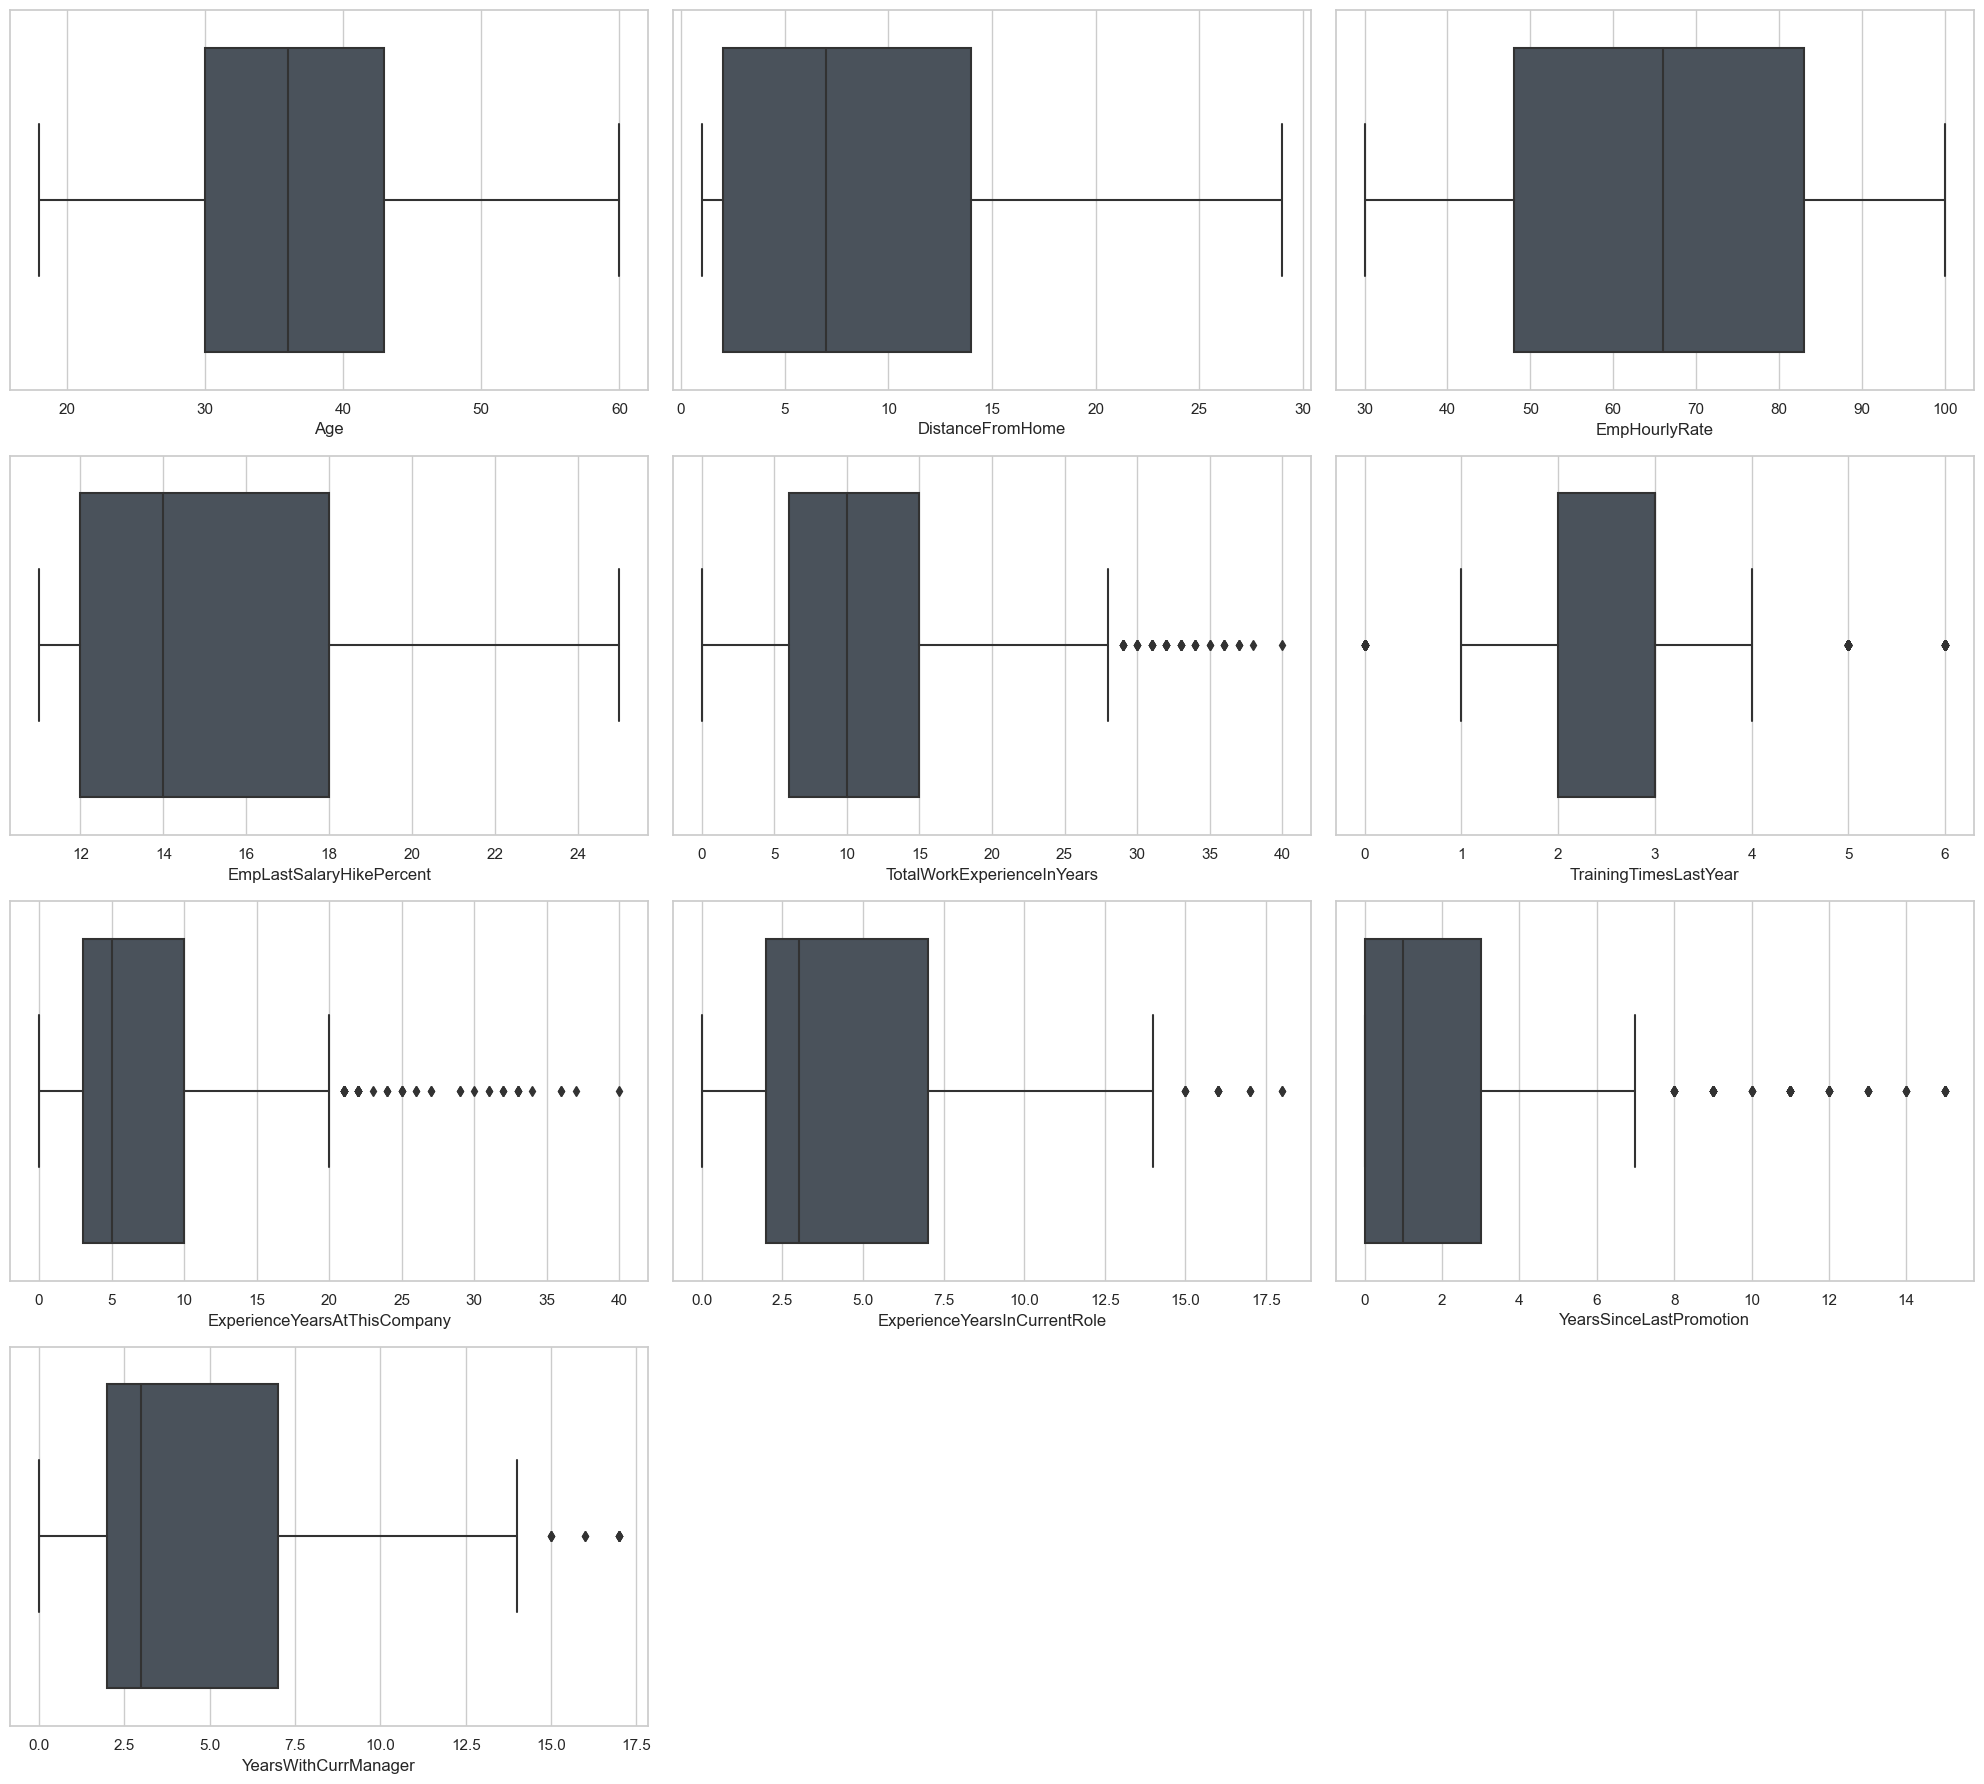

In [25]:
custom_palette = ["#47525E", "#606B76", "#7A878F", "#949EA7", "#ADB7BF"]

# Set the style and color palette
sns.set(style="whitegrid", palette=custom_palette)

# Selecting the columns of interest from the data
out = df[['Age', 'DistanceFromHome', 'EmpHourlyRate', 'EmpLastSalaryHikePercent',
            'TotalWorkExperienceInYears', 'TrainingTimesLastYear', 'ExperienceYearsAtThisCompany',
            'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]

# Set up the plotting canvas
plt.figure(figsize=(20, 18)) 

# Counter for subplot placement
plotno = 1 

# Iterate through columns
for column in out:
    if plotno <= 12:
        plt.subplot(4, 3, plotno)
        sns.boxplot(data=out, x=column, palette=custom_palette)  # Use the custom palette for the boxplot
        plt.xlabel(column, fontsize=12)
    plotno += 1

plt.tight_layout()
plt.show()

In this case, we are employing the interquartile range for outlier imputation due to the non-normal distribution of the data.

**IQR (Interquartile Range):**
* IQR represents the interquartile range. When a dataset contains outliers or significant values, we describe a central value using the median instead of the mean. It is calculated as the difference between the first and third quartiles.

#### 1.Total Work Experiance in year

In [26]:
import scipy.stats as stats

# Calculate IQR
iqr = stats.iqr(df['TotalWorkExperienceInYears'], interpolation='midpoint')

# Getting first and third quartiles
Q1 = df['TotalWorkExperienceInYears'].quantile(0.25)
Q3 = df['TotalWorkExperienceInYears'].quantile(0.75)

# Calculate maximum and minimum limits
min_limit = Q1 - 1.5 * iqr
max_limit = Q3 + 1.5 * iqr

print("IQR:", iqr)
print("Minimum limit:", min_limit)
print("Maximum Limit:", max_limit)

IQR: 9.0
Minimum limit: -7.5
Maximum Limit: 28.5


In [27]:
# Impute outliers in the 'TotalWorkExperienceInYears' column
# Replace values exceeding the upper limit with the median of the column
df.loc[df['TotalWorkExperienceInYears'] > max_limit, 'TotalWorkExperienceInYears'] = df['TotalWorkExperienceInYears'].median()

In [28]:
# Filter rows where 'TotalWorkExperienceInYears' still exceeds the upper limit after imputation
outlier_remaining = df.loc[df['TotalWorkExperienceInYears'] > max_limit]

In [29]:
outlier_remaining

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


#### 2.Training Times Last Year

In [30]:
# Calculate IQR, quartiles, and limits for 'TrainingTimesLastYear' column
column_name = 'TrainingTimesLastYear'

iqr = stats.iqr(df[column_name], interpolation='midpoint')
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)

min_limit = Q1 - 1.5 * iqr
max_limit = Q3 + 1.5 * iqr

print("IQR:", iqr)
print("Minimum limit:", min_limit)
print("Maximum Limit:", max_limit)

IQR: 1.0
Minimum limit: 0.5
Maximum Limit: 4.5


In [31]:
# Impute outliers in the 'TrainingTimesLastYear' column
# Replace values below the lower limit with the median of the column
df.loc[df['TrainingTimesLastYear'] < min_limit, 'TrainingTimesLastYear'] = df['TrainingTimesLastYear'].median()

# Replace values above the upper limit with the median of the column
df.loc[df['TrainingTimesLastYear'] > max_limit, 'TrainingTimesLastYear'] = df['TrainingTimesLastYear'].median()


In [32]:
# Filter rows where 'TrainingTimesLastYear' is below the lower limit after imputation
outliers_below_min = df.loc[df['TrainingTimesLastYear'] < min_limit]

In [33]:
# Filter rows where 'TrainingTimesLastYear' is above the upper limit after imputation
outliers_above_max = df.loc[df['TrainingTimesLastYear'] > max_limit]

#### 3.Experience Years At This Company

In [34]:
# Use iqr range because some skewed in data
iqr = stats.iqr(df['ExperienceYearsAtThisCompany'],interpolation='midpoint')
print("IQR:",iqr)

# Getting first & third quantile
Q1 = df['ExperienceYearsAtThisCompany'].quantile(0.25)
Q3 = df['ExperienceYearsAtThisCompany'].quantile(0.75)

# Get maximum and minimum limit
min_limit = Q1 - 1.5*iqr
print("Minimum limit:",min_limit)

max_limit = Q3 + 1.5*iqr
print("Maximum Limit:",max_limit)

IQR: 7.0
Minimum limit: -7.5
Maximum Limit: 20.5


In [35]:
# Impute outliers in the 'ExperienceYearsAtThisCompany' column
# Replace values exceeding the upper limit with the median of the column
df.loc[df['ExperienceYearsAtThisCompany'] > max_limit, 'ExperienceYearsAtThisCompany'] = df['ExperienceYearsAtThisCompany'].median()

In [36]:
# Filter rows where 'ExperienceYearsAtThisCompany' is above the upper limit after imputation
outliers_above_max = df.loc[df['ExperienceYearsAtThisCompany'] > max_limit]

#### 4.Experience Years In Current Role

In [37]:
def calculate_iqr_limits(column):
    iqr = stats.iqr(column, interpolation='midpoint')
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)

    min_limit = Q1 - 1.5 * iqr
    max_limit = Q3 + 1.5 * iqr

    return iqr, min_limit, max_limit

# Calculate IQR, quartiles, and limits for 'ExperienceYearsInCurrentRole' column
iqr, min_limit, max_limit = calculate_iqr_limits(df['ExperienceYearsInCurrentRole'])

print("IQR:", iqr)
print("Minimum limit:", min_limit)
print("Maximum Limit:", max_limit)

IQR: 5.0
Minimum limit: -5.5
Maximum Limit: 14.5


In [38]:
# Impute the outlier
df.loc[df['ExperienceYearsInCurrentRole'] > max_limit,'ExperienceYearsInCurrentRole'] = df['ExperienceYearsInCurrentRole'].median()

In [39]:
# Filter rows where 'ExperienceYearsInCurrentRole' is above the upper limit after outlier handling
outliers_above_max = df.loc[df['ExperienceYearsInCurrentRole'] > max_limit]

#### 5.Years Since Last Promotion

In [40]:
def calculate_iqr_limits(column):
    iqr = stats.iqr(column, interpolation='midpoint')
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)

    min_limit = Q1 - 1.5 * iqr
    max_limit = Q3 + 1.5 * iqr

    return iqr, min_limit, max_limit

# Calculate IQR, quartiles, and limits for 'YearsSinceLastPromotion' column
iqr, min_limit, max_limit = calculate_iqr_limits(df['YearsSinceLastPromotion'])

print("IQR:", iqr)
print("Minimum limit:", min_limit)
print("Maximum limit:", max_limit)

IQR: 3.0
Minimum limit: -4.5
Maximum limit: 7.5


In [41]:
# Impute outliers in the 'YearsSinceLastPromotion' column
# Replace values above the upper limit with the median of the column
df.loc[df['YearsSinceLastPromotion'] > max_limit, 'YearsSinceLastPromotion'] = df['YearsSinceLastPromotion'].median()

In [42]:
# Filter rows where 'YearsSinceLastPromotion' is above the upper limit after imputation
outliers_above_max = df.loc[df['YearsSinceLastPromotion'] > max_limit]


#### 6.Years With Current Manager

In [43]:
def calculate_iqr_limits(column):
    iqr = stats.iqr(column, interpolation='midpoint')
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)

    min_limit = Q1 - 1.5 * iqr
    max_limit = Q3 + 1.5 * iqr

    return iqr, min_limit, max_limit

# Calculate IQR, quartiles, and limits for 'YearsWithCurrManager' column
iqr, min_limit, max_limit = calculate_iqr_limits(df['YearsWithCurrManager'])

print("IQR:", iqr)
print("Minimum limit:", min_limit)
print("Maximum limit:", max_limit)

IQR: 5.0
Minimum limit: -5.5
Maximum limit: 14.5


In [44]:
# Impute outliers in the 'YearsWithCurrManager' column
# Replace values above the upper limit with the median of the column
df.loc[df['YearsWithCurrManager'] > max_limit, 'YearsWithCurrManager'] = df['YearsWithCurrManager'].median()

In [45]:
# Filter rows where 'YearsWithCurrManager' is above the upper limit after imputation
df.loc[df['YearsWithCurrManager'] > max_limit]

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


#### CHECKING OUTLIER AFTER IMPUTATION

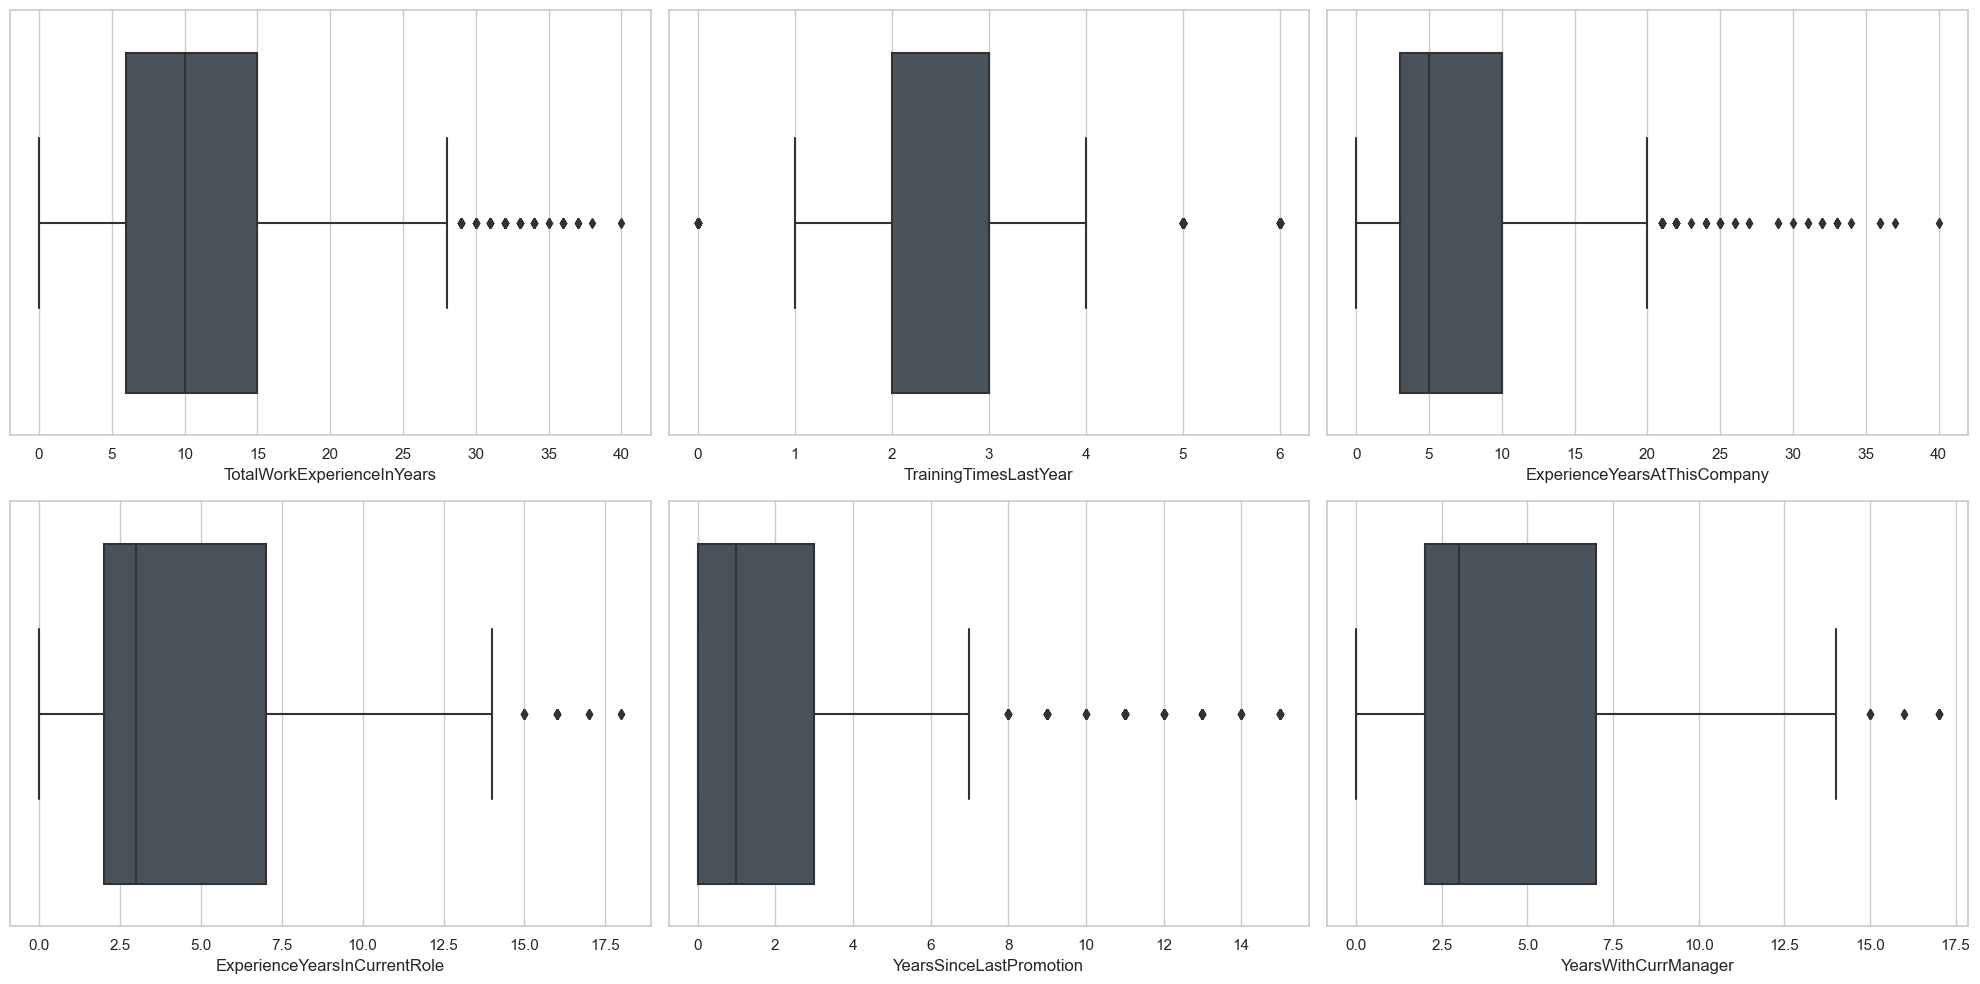

In [46]:
# Columns to visualize
columns_to_visualize = ['TotalWorkExperienceInYears', 'TrainingTimesLastYear', 'ExperienceYearsAtThisCompany',
                        'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

# Create a 2x3 grid of subplots
plt.figure(figsize=(20, 10))
plot_rows = 2
plot_cols = 3
plot_index = 1

for column in columns_to_visualize:
    if plot_index <= plot_rows * plot_cols:
        plt.subplot(plot_rows, plot_cols, plot_index)
        sns.boxplot(data=out, x=column, palette=custom_palette)  # Set boxplot color using custom_palette
        plt.xlabel(column, fontsize=12)
        plot_index += 1

plt.tight_layout()
plt.show()

**Observation:**
* Outlier imputation was successful for most features, but some feature box plots still display outliers. As a result, imputing these outliers might not be appropriate due to their potential significance.

### Feature Transformation

* Based on the findings from the previous Exploratory Data Analysis (EDA) file, it was observed that the 'YearsSinceLastPromotion' feature exhibits some skewness in the data distribution. Consequently, we intend to address this skewness by applying a square root transformation to the feature.

**Q-Q Plot (Quantile-Quantile Plot):** The Q-Q plot is a graphical technique used for comparing two probability distributions by plotting their quantiles against each other. This visualization helps assess whether a dataset follows a specific theoretical distribution, and it aids in identifying deviations from the expected distribution.

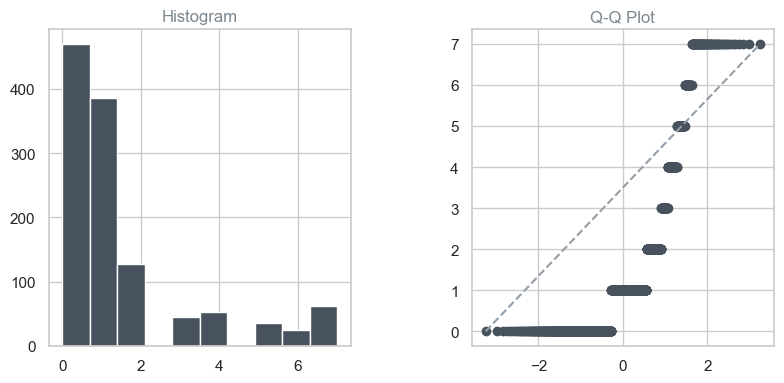

In [47]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Set the color palette with different shades of the theme color
custom_palette = ["#47525E", "#606B76", "#7A878F", "#949EA7", "#ADB7BF"]

def plot_df(df, feature):
    plt.figure(figsize=(8, 4))
    
    # Plot histogram
    plt.subplot(1, 2, 1)
    df[feature].hist(color=custom_palette[0])  # Match the color
    plt.title('Histogram', color=custom_palette[2])  # Match the title color
    
    # Plot Q-Q plot
    plt.subplot(1, 2, 2)
    qq_data = stats.probplot(df[feature], dist='norm', fit=False)
    plt.scatter(qq_data[0], qq_data[1], color=custom_palette[0])  # Match the color
    plt.plot([min(qq_data[0]), max(qq_data[0])], [min(qq_data[1]), max(qq_data[1])], color=custom_palette[3], linestyle='--')  # Match the color
    plt.title('Q-Q Plot', color=custom_palette[2])  # Match the title color
    
    plt.tight_layout()
    plt.subplots_adjust(wspace=0.4)
    
    plt.show()

plot_df(df, 'YearsSinceLastPromotion')

#### SQUARE ROOT TRANSFORMATION


In [48]:
df['square_YearsSinceLastPromotion'] = df['YearsSinceLastPromotion'] ** 0.5

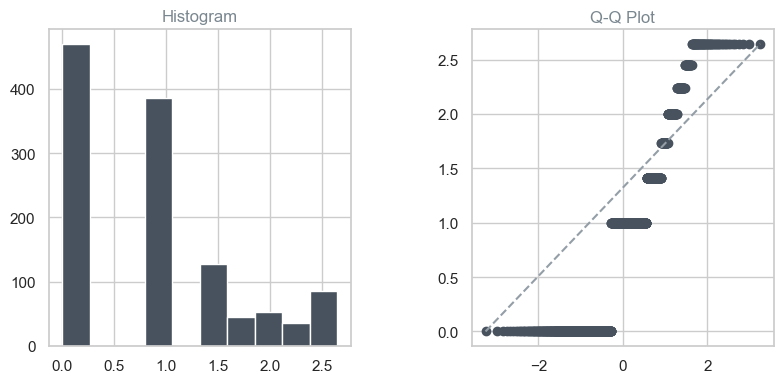

In [49]:
plot_df(df,'square_YearsSinceLastPromotion')

### SCALING THE DATA

**Standard Scaling**:
Standardization involves rescaling a feature, assuming it follows a normal distribution, to have a mean of 0 and a standard deviation of 1. This process centers the data around zero while maintaining a consistent spread.

In [50]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# List of columns to be scaled
columns_to_scale = ['Age', 'DistanceFromHome', 'EmpHourlyRate', 'EmpLastSalaryHikePercent',
                    'TotalWorkExperienceInYears', 'TrainingTimesLastYear', 'ExperienceYearsAtThisCompany',
                    'ExperienceYearsInCurrentRole', 'YearsWithCurrManager', 'square_YearsSinceLastPromotion']

# Apply standard scaling to the specified columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [51]:
df.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating,square_YearsSinceLastPromotion
0,E1001000,-0.541458,1,3,1,5,18,2,0.102061,3,4,-0.543569,3,2,4,1,1,-0.889111,4,-0.058535,-0.879579,2,0.868276,0.864098,0,1.202103,1,3,-1.057559
1,E1001006,1.109888,1,3,1,5,18,2,0.591464,4,4,-1.187042,3,2,1,2,1,-0.889111,4,1.512870,-0.879579,3,0.200371,0.864098,1,0.902825,1,3,0.151501
2,E1001007,0.339260,1,5,2,5,18,1,-0.509693,4,4,-0.890055,2,3,1,5,0,1.594054,3,1.512870,-0.879579,3,2.649355,2.661702,1,2.399219,1,4,0.151501
3,E1001009,0.449349,1,0,0,2,11,2,0.102061,4,2,0.347393,2,5,4,3,1,-0.061389,2,1.984292,-0.879579,2,-0.244898,0.564498,1,0.603546,1,3,0.151501
4,E1001010,2.541054,1,3,1,5,18,2,0.836165,4,1,0.891870,3,2,1,8,1,-0.337297,4,-0.058535,-2.303999,3,-0.912803,-0.633905,2,-0.593570,1,3,0.652311


### FEATURE SELECTION

#### DROP UNIQUE AND CONTANT FEATURES

In [52]:
# Dropping employee number because this is a constant column as well as drop Years Since Last Promotion because we create a new feaure using square root tr
df.drop(['EmpNumber','YearsSinceLastPromotion'],axis=1,inplace=True)

**Correlation Check using Heatmap**:
A heatmap is a visual representation that employs color-coded cells to display the correlations between variables in a dataset. It's a powerful tool to quickly identify patterns and relationships within the data.

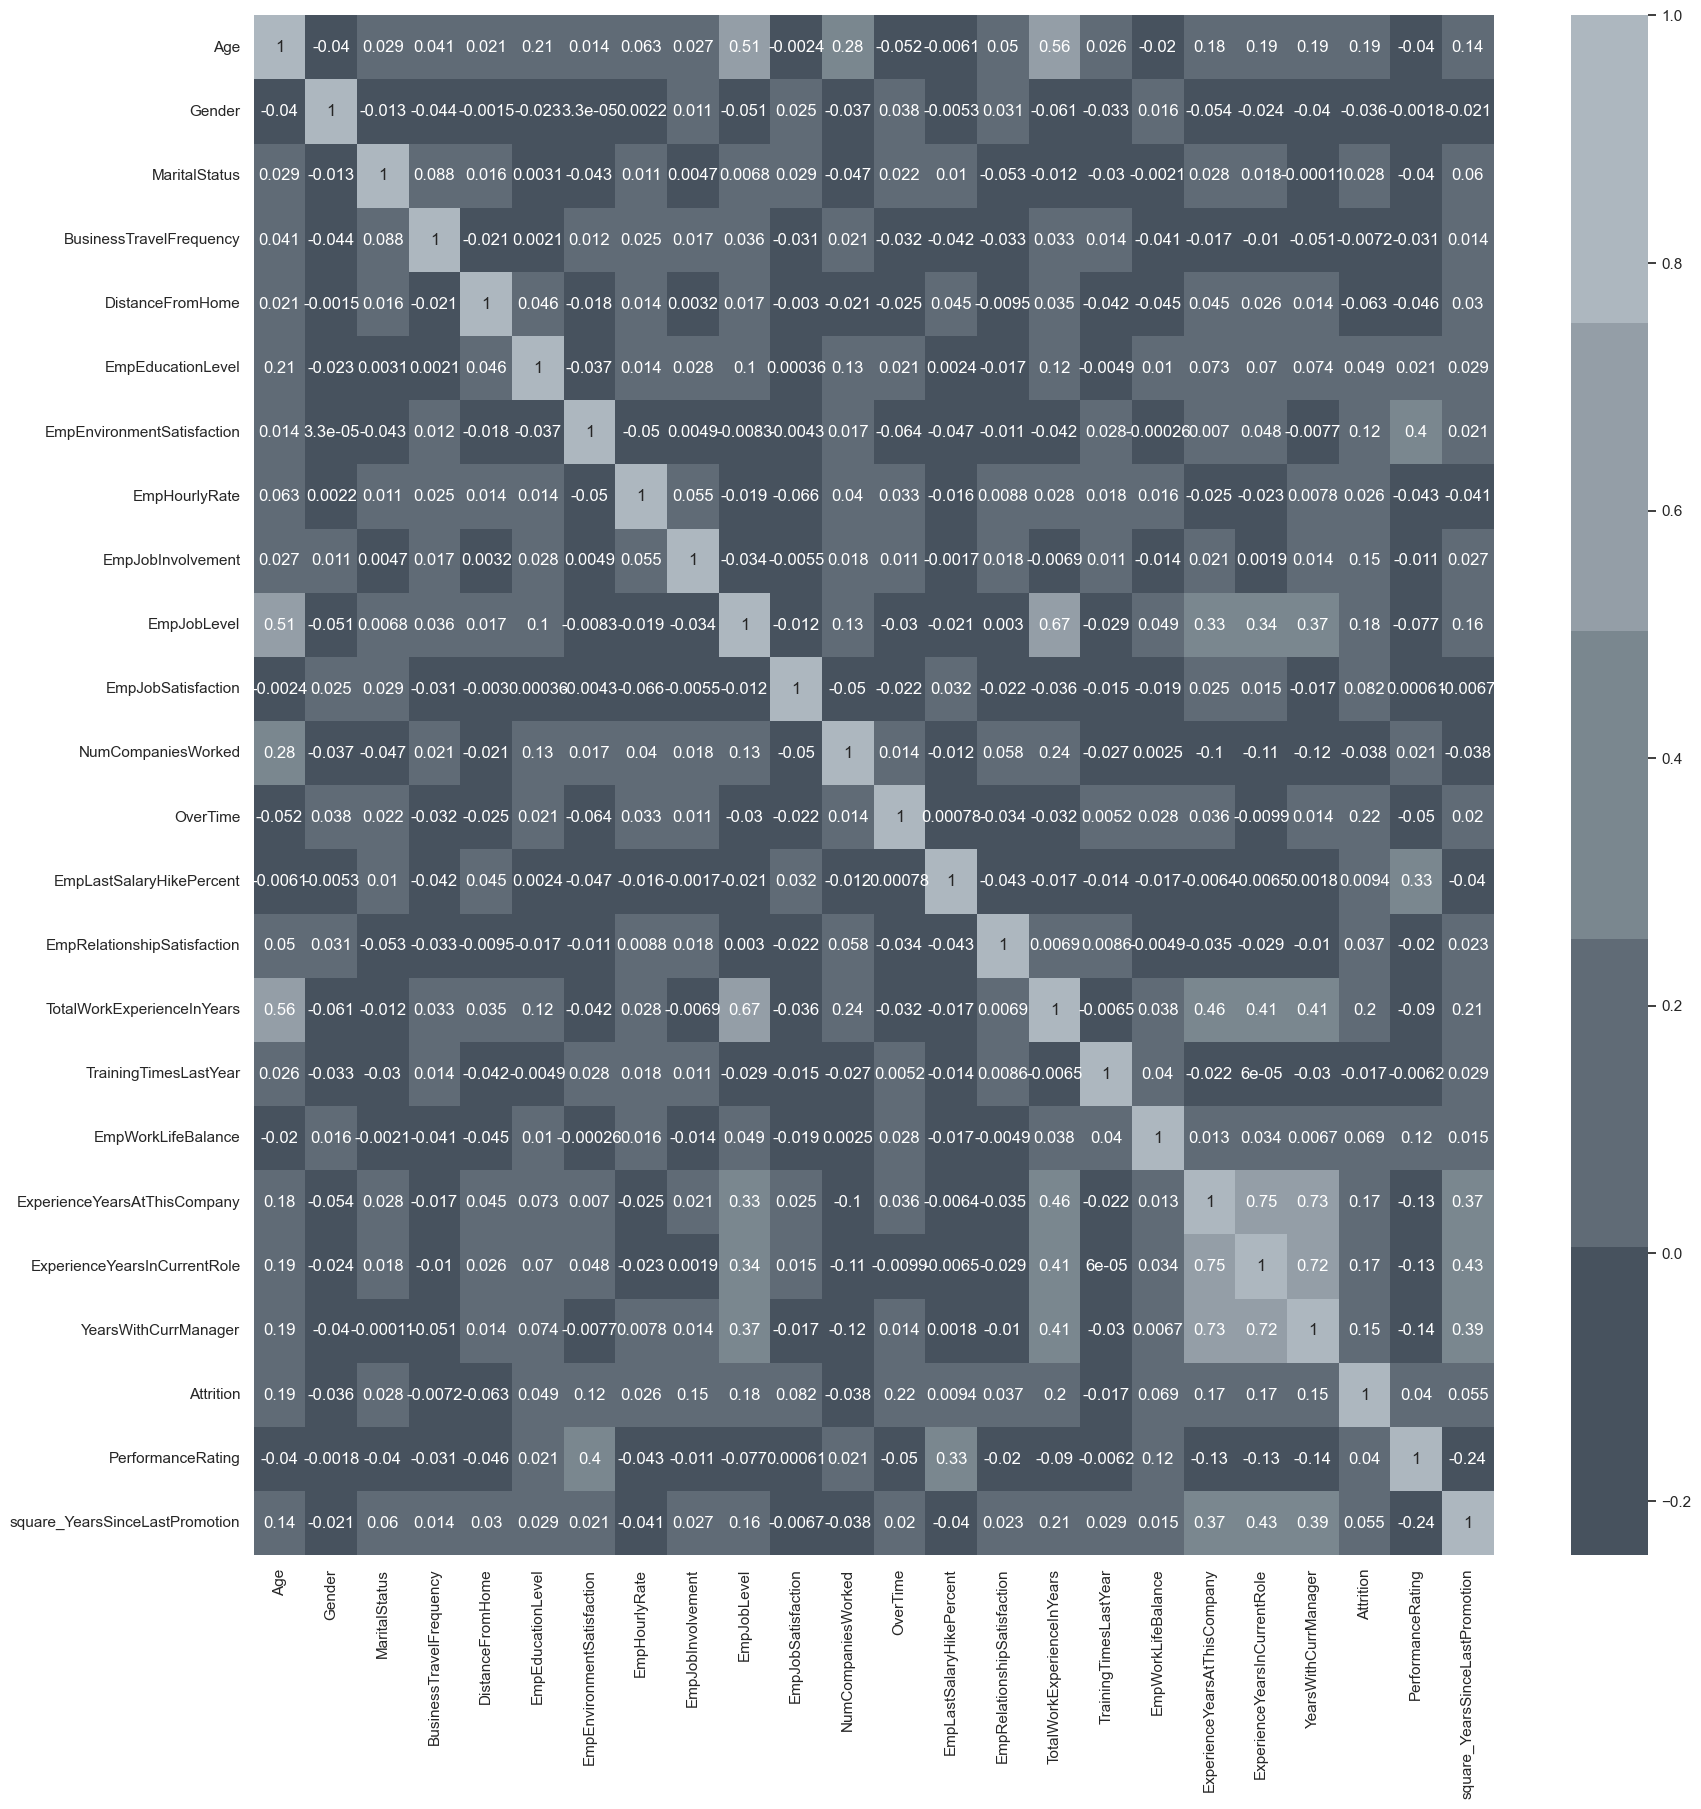

In [53]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, cmap=custom_palette)  # Use custom_palette as the colormap
plt.show()

In [54]:
# To get highly corelated feature
pd.set_option('display.max_rows',None)
corrmat = df.corr()
corrmat = corrmat.abs().unstack()
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat [corrmat >= 0.9] # Set threshold 0.9
corrmat = corrmat [corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1','feature2','corr']
corrmat

,feature1,feature2,corr


*You've confirmed that there are no highly correlated features present.*

#### CHECKING DUPLICATES

In [55]:
df.duplicated().sum()

0

*There are no duplicates present in the data.*

#### PRINCIPLE COMPONENT ANALYSIS

*Principal Component Analysis (PCA) is a widely used technique for analyzing large datasets with numerous dimensions or features per observation. It enhances data interpretation by retaining the most essential information while reducing dimensionality. This enables the visualization of complex multidimensional data, making it a valuable tool for data analysis.*

**Used For:** When dealing with datasets that have over 25 features, PCA becomes valuable. It aids in noise reduction by retaining only the most significant features, thereby preventing overfitting and enhancing model performance.

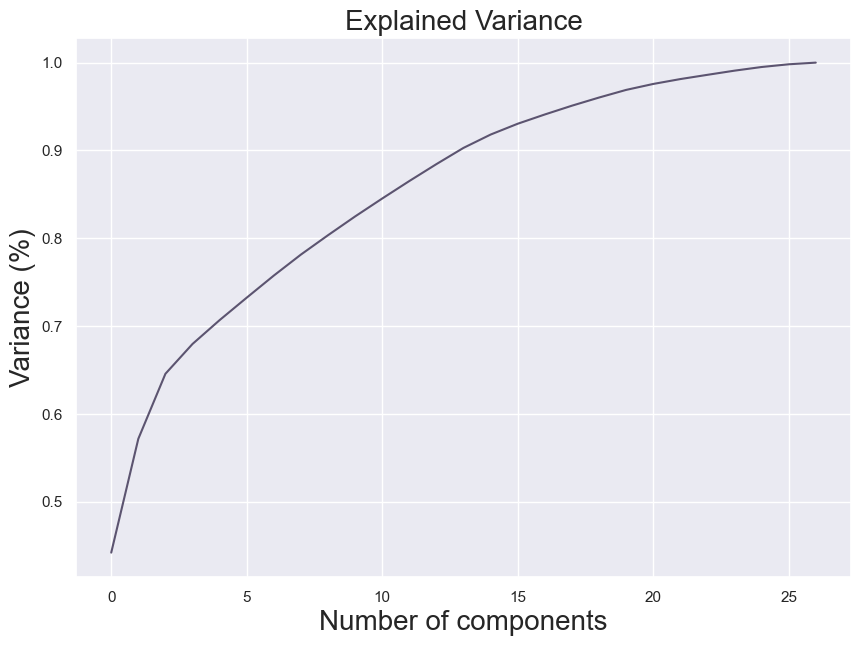

In [56]:
from sklearn.decomposition import PCA
import numpy as np

# Create a PCA object
pca = PCA()

# Fit the PCA and transform the data
principal_components = pca.fit_transform(df)

plt.figure(figsize=(10, 7))
sns.set_style('darkgrid')
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='#5C5470')  # Set theme color
plt.xlabel('Number of components', fontsize=20)
plt.ylabel('Variance (%)', fontsize=20)
plt.title('Explained Variance', fontsize=20)
plt.show()

**Observation:** After removing unique and constant columns, the dataset contains a total of 27 features. The PCA analysis indicates that using 25 features results in minimal variance loss. As a result, we will proceed with selecting these 25 features for further analysis.

In [57]:
# Selecting the components
pca = PCA(n_components=25)
new_df = pca.fit_transform(df)
new_df

array([[-4.47979357e+00, -1.62579961e+00,  1.04815246e+00, ...,
        -5.02890736e-01,  2.28337153e-01, -3.52744289e-01],
       [-4.35607380e+00, -6.82890846e-02,  2.01617388e+00, ...,
        -8.88367129e-01, -2.37235986e-01, -7.10042471e-01],
       [-4.24318059e+00,  2.56096162e+00,  4.36307191e+00, ...,
        -4.34724440e-01, -3.56723825e-01,  6.46996038e-01],
       ...,
       [ 1.64245087e+00, -1.73309807e+00,  3.13585566e+00, ...,
        -1.70950647e-01,  3.39096853e-01,  1.12605457e+00],
       [ 9.10590984e+00, -2.09875367e+00,  1.48314921e+00, ...,
         6.10226389e-01,  1.08399769e-02, -2.99560396e-01],
       [-4.36428097e+00,  5.98213577e+00, -2.10105411e+00, ...,
         6.48347080e-01, -7.17937795e-03, -2.95697975e-02]])

#### CREATE NEW DATAFRAME

In [58]:
principle_df = pd.DataFrame(data=new_df, columns=['pca1','pca2','pca3','pca4','pca5','pca6','pca7','pca8','pca9','pca10',
                             'pca11','pca12','pca13','pca14','pca15','pca16','pca17','pca18','pca19','pca20','pca21','pca22',
                             'pca23','pca24','pca25'])

# Add target veriable to preprocess dataframe for model building & evaluation
principle_df['PerformanceRating']=df.PerformanceRating

principle_df.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15,pca16,pca17,pca18,pca19,pca20,pca21,pca22,pca23,pca24,pca25,PerformanceRating
0,-4.479794,-1.625800,1.048152,0.935689,-0.917397,1.027783,-0.831539,-1.471238,0.515184,0.449498,-1.242865,-0.169772,-0.859328,-0.263105,1.361126,-0.655418,0.888525,0.099724,-0.470607,0.012552,0.192366,0.199055,-0.502891,0.228337,-0.352744,3
1,-4.356074,-0.068289,2.016174,1.516783,0.418864,-0.582535,-1.714894,0.026681,0.985278,0.830725,-1.723557,1.171481,0.265575,0.276425,0.133615,-0.157664,0.505885,-0.359134,0.420803,-0.929058,-0.495041,0.306019,-0.888367,-0.237236,-0.710042,3
2,-4.243181,2.560962,4.363072,-0.182532,-1.773880,-0.362873,-0.431528,1.308032,0.449781,1.957530,0.189355,2.290069,-1.197808,0.131160,0.786889,-1.267936,-0.624628,0.504683,0.559195,0.081618,-0.256092,-0.242872,-0.434724,-0.356724,0.646996,4
3,3.013748,0.725983,2.326672,3.288183,2.309574,1.909985,1.083119,-0.226786,-0.112988,-0.191132,-0.139197,-1.408616,-0.384020,1.151003,0.504962,1.558104,-0.273501,0.891281,-1.533583,0.700066,0.113402,-0.186438,-0.566017,-0.066069,-0.500048,3
4,-4.246565,5.966600,-0.246302,0.789979,2.096761,-1.712339,0.769025,-0.516950,0.788577,1.125638,-1.642460,0.142828,-0.727865,-0.051626,-1.509516,0.652274,0.614179,-0.295793,0.970469,-1.179984,0.793859,-0.107046,-0.218167,0.456973,-0.147894,3


### SAVE PRE-PROCESS DATA

In [59]:
principle_df.to_csv('preprocessed_employee_data.csv')

# Reading new preprocess csv file
df1 = pd.read_csv('preprocessed_employee_data.csv')

# Get first five rows
df1.head()

,Unnamed: 0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15,pca16,pca17,pca18,pca19,pca20,pca21,pca22,pca23,pca24,pca25,PerformanceRating
0,0,-4.479794,-1.625800,1.048152,0.935689,-0.917397,1.027783,-0.831539,-1.471238,0.515184,0.449498,-1.242865,-0.169772,-0.859328,-0.263105,1.361126,-0.655418,0.888525,0.099724,-0.470607,0.012552,0.192366,0.199055,-0.502891,0.228337,-0.352744,3
1,1,-4.356074,-0.068289,2.016174,1.516783,0.418864,-0.582535,-1.714894,0.026681,0.985278,0.830725,-1.723557,1.171481,0.265575,0.276425,0.133615,-0.157664,0.505885,-0.359134,0.420803,-0.929058,-0.495041,0.306019,-0.888367,-0.237236,-0.710042,3
2,2,-4.243181,2.560962,4.363072,-0.182532,-1.773880,-0.362873,-0.431528,1.308032,0.449781,1.957530,0.189355,2.290069,-1.197808,0.131160,0.786889,-1.267936,-0.624628,0.504683,0.559195,0.081618,-0.256092,-0.242872,-0.434724,-0.356724,0.646996,4
3,3,3.013748,0.725983,2.326672,3.288183,2.309574,1.909985,1.083119,-0.226786,-0.112988,-0.191132,-0.139197,-1.408616,-0.384020,1.151003,0.504962,1.558104,-0.273501,0.891281,-1.533583,0.700066,0.113402,-0.186438,-0.566017,-0.066069,-0.500048,3
4,4,-4.246565,5.966600,-0.246302,0.789979,2.096761,-1.712339,0.769025,-0.516950,0.788577,1.125638,-1.642460,0.142828,-0.727865,-0.051626,-1.509516,0.652274,0.614179,-0.295793,0.970469,-1.179984,0.793859,-0.107046,-0.218167,0.456973,-0.147894,3
